In [2]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics

%matplotlib inline

### 1. Загрузить файл hr.csv.

In [100]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение).

In [5]:
df.describe().round(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000
mean,0.613,0.716,3.803,201.050,3.498,0.145,0.238,0.021
std,0.249,0.171,1.233,49.943,1.460,0.352,0.426,0.144
min,0.090,0.360,2.000,96.000,2.000,0.000,0.000,0.000
25%,0.440,0.560,3.000,156.000,3.000,0.000,0.000,0.000
50%,0.640,0.720,4.000,200.000,3.000,0.000,0.000,0.000
75%,0.820,0.870,5.000,245.000,4.000,0.000,0.000,0.000
max,1.000,1.000,7.000,310.000,10.000,1.000,1.000,1.000


In [7]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Рассчитать и визуализировать корреляционную матрицу для переменных.

Для того, чтобы не потерять значения типа object при подсчете корреляции, преобразуем их в числовой тип 

In [31]:
df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [10]:
df['wage'] = df['salary']
df.loc[df['salary'] == 'low', 'wage'] = 0
df.loc[df['salary'] == 'medium', 'wage'] = 1
df.loc[df['salary'] == 'high', 'wage' ] = 2

In [11]:
df['department'] = df['sales']
df.loc[df['sales'] == 'sales', 'department'] = 1
df.loc[df['sales'] == 'technical', 'department'] = 2
df.loc[df['sales'] == 'support', 'department'] = 3
df.loc[df['sales'] == 'IT', 'department'] = 4
df.loc[df['sales'] == 'product_mng', 'department'] = 5
df.loc[df['sales'] == 'marketing', 'department'] = 6
df.loc[df['sales'] == 'RandD', 'department'] = 7
df.loc[df['sales'] == 'accounting', 'department'] = 8
df.loc[df['sales'] == 'hr', 'department'] = 9
df.loc[df['sales'] == 'management', 'department'] = 10

In [12]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,wage,department
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1


In [13]:
print('Корреляционная матрица')
np.around(df.corr(), decimals=3)

Корреляционная матрица


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,wage,department
satisfaction_level,1.000,0.105,-0.143,-0.020,-0.101,0.059,-0.388,0.026,0.050,-0.008
last_evaluation,0.105,1.000,0.349,0.340,0.132,-0.007,0.007,-0.009,-0.013,0.005
number_project,-0.143,0.349,1.000,0.417,0.197,-0.005,0.024,-0.006,-0.002,-0.008
average_montly_hours,-0.020,0.340,0.417,1.000,0.128,-0.010,0.071,-0.004,-0.002,-0.009
time_spend_company,-0.101,0.132,0.197,0.128,1.000,0.002,0.145,0.067,0.049,0.044
Work_accident,0.059,-0.007,-0.005,-0.010,0.002,1.000,-0.155,0.039,0.009,0.003
left,-0.388,0.007,0.024,0.071,0.145,-0.155,1.000,-0.062,-0.158,-0.028
promotion_last_5years,0.026,-0.009,-0.006,-0.004,0.067,0.039,-0.062,1.000,0.098,0.073
wage,0.050,-0.013,-0.002,-0.002,0.049,0.009,-0.158,0.098,1.000,0.103
department,-0.008,0.005,-0.008,-0.009,0.044,0.003,-0.028,0.073,0.103,1.000


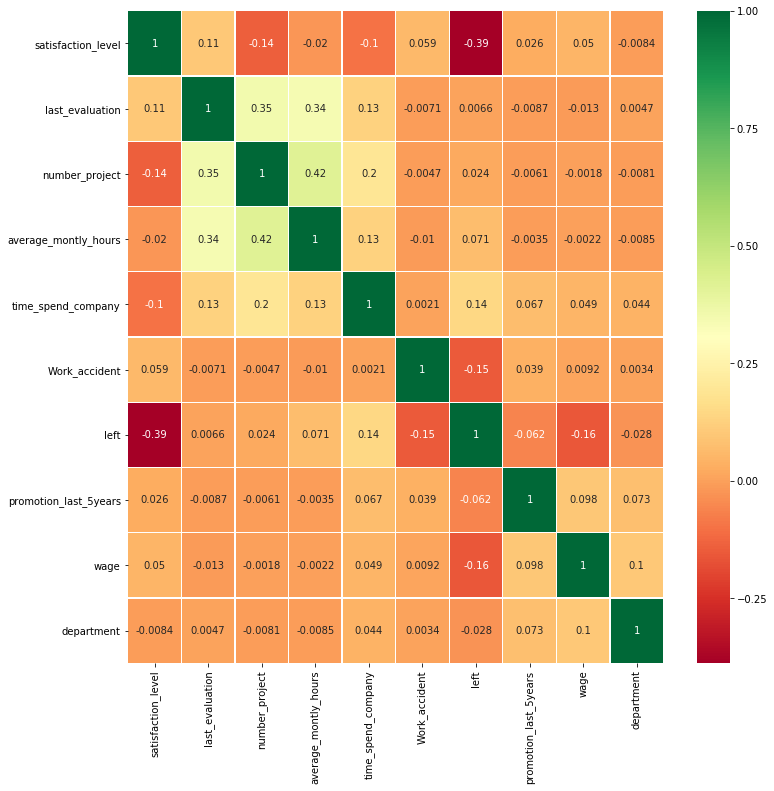

In [14]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

### 4. Визуализировать несколько взаимосвязей между переменными.

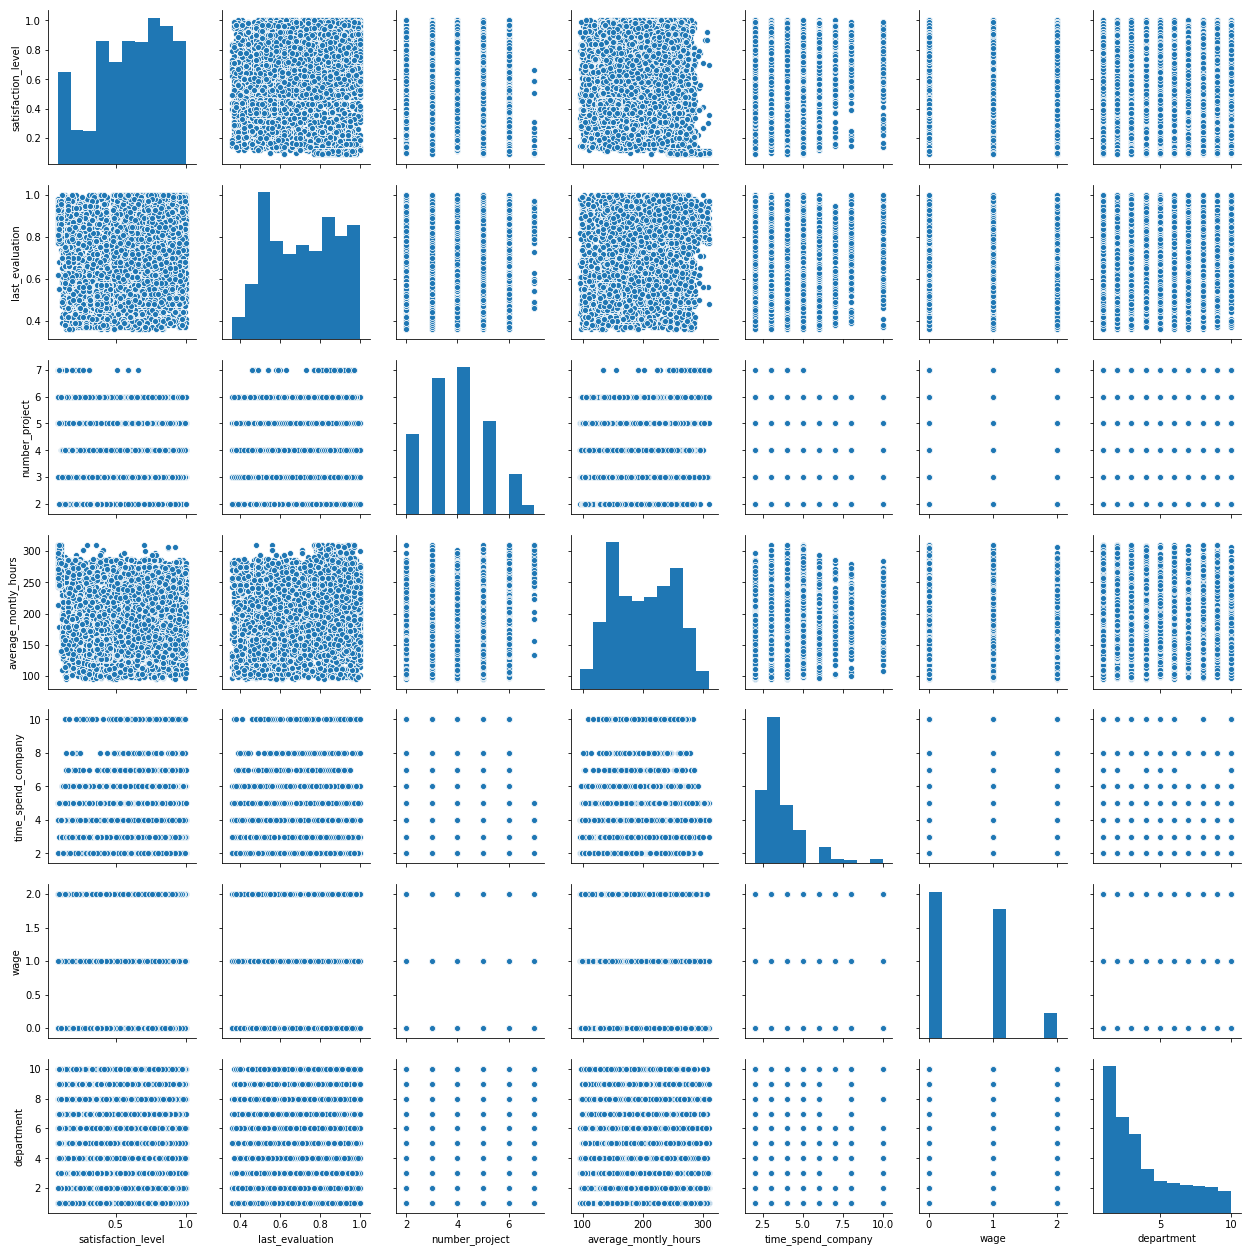

In [17]:
sns.pairplot(df, vars=['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'wage', 'department'], kind="scatter")

Из попарных графиков для выборки сложно сделать какие-либо выводы о взаимосвязи переменных. Большинство распределений в колонках таблицы - дискретные. Построим графики линейной регрессии для отдельных пар столбцов.

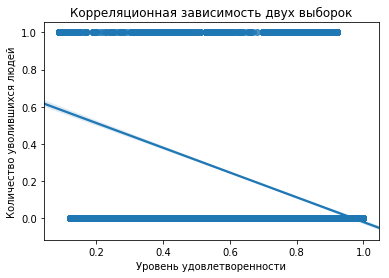

In [19]:
satisf = df['satisfaction_level']
left = df['left']
sns.regplot(x = satisf, y = left, data = df, fit_reg = True)
plt.xlabel('Уровень удовлетворенности')
plt.ylabel('Количество уволившихся людей')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

На данном графике кривая линейной регрессии демонстрирует, что у сотрудников, которые не уволились, уровень удовлетворенности выше.

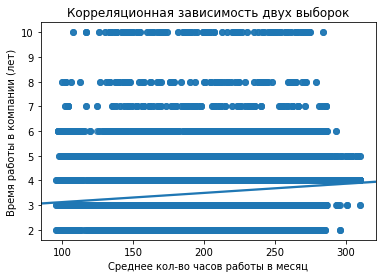

In [22]:
av_hours = df['average_montly_hours']
time = df['time_spend_company']
sns.regplot(x = av_hours, y = time, data = df, fit_reg = True)
plt.xlabel('Среднее кол-во часов работы в месяц')
plt.ylabel('Время работы в компании (лет)')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

Кривая демонстирует, что сотрудники, работающие большее количество часов в месяц, большее количество лет работают в компании в целом.

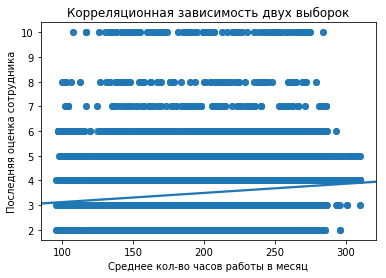

In [23]:
av_hours = df['average_montly_hours']
evaluation = df['last_evaluation']
sns.regplot(x = av_hours, y = time, data = df, fit_reg = True)
plt.xlabel('Среднее кол-во часов работы в месяц')
plt.ylabel('Последняя оценка сотрудника')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

По наклону прямой опять можно сделать вывод, что есть небольшая кореляция и более высокие оценки получают сотрудники, работающие большее количество часов в месяц.

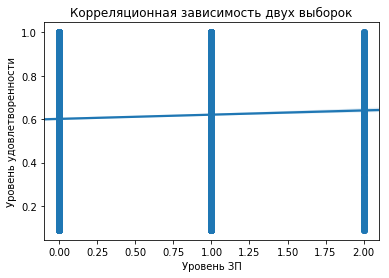

In [24]:
wage = df['wage']
satisf = df['satisfaction_level']
sns.regplot(x = wage, y = satisf, data = df, fit_reg = True)
plt.xlabel('Уровень ЗП')
plt.ylabel('Уровень удовлетворенности')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

Кривая демонстрирует слабую положительную взаимосвязь между уровнем ЗП и ростом уровня удовлетворенности.

### 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

5.1. Сравним уровень удовлетворенности у сотрудников, которые получают высокую ЗП, и всех сотрудников, используя одновыборочный t-критерий.

In [38]:
high_sal = df[df['wage']==2]['satisfaction_level']
stats.ttest_1samp(high_sal, df['satisfaction_level'].mean())

Ttest_1sampResult(statistic=3.82059975018617, pvalue=0.00013974368695866474)

Так как p-value гораздо меньше стандартной альфа ошибки 0.05, мы не принимаем нулевую гипотезу о сходстве и можем сказать, что имеется статистическое различие между уровнем удовлетворенности у сотрудников с высокой ЗП и всех сотрудников компании.

5.2. Проверим взаимосвязь между количеством рабочих часов в месяц, отталкиваясь от медианного числа 200, и значением последней оценки работника.    

In [120]:
hardworking = df[df['average_montly_hours']>200]['last_evaluation']
non_hardworking = df[df['average_montly_hours']<=200]['last_evaluation']

In [121]:
len(hardworking), len(non_hardworking)

(7475, 7524)

In [122]:
# немного уравняем выборки по размеру
hardworking = hardworking.sample(7000)
non_hardworking = non_hardworking.sample(7000)

In [123]:
# проверим дисперсию для равных по размеру сэмплов
statistics.variance(hardworking), statistics.variance(non_hardworking)

(0.02560646691568183, 0.02808783527442696)

In [124]:
# так как дисперсия разная, используем t-критерий Уэлша
stats.ttest_ind(hardworking, left_sat, equal_var=False)

Ttest_indResult(statistic=67.59866813160052, pvalue=0.0)

Полученное p-value гораздо меньше стандартной альфа ошибки 0.05, поэтому мы не принимаем нулевую гипотезу и можем сказать, что имеется статистическое различие между уровнем оценки у сотрудников, работающих менее 200 часов в месяц и работающих более 200 часов.

5.3. Проверим взаимосвязь у трех групп сотрудников с разным уровнем ЗП, используя множественный тест Annova.

In [66]:
low_sal_sat = df[df['wage']==0]['satisfaction_level']

medium_sal_sat = df[df['wage']==1]['satisfaction_level']

high_sal_sat = df[df['wage']==2]['satisfaction_level']

stats.f_oneway(low_sal_sat, medium_sal_sat, high_sal_sat)

F_onewayResult(statistic=18.960895741998826, pvalue=5.967355425747657e-09)

Так как результат p-value меньше 0.05, то мы отвергаем нулевую гипотезу о том, что нет различий у групп сотрудников с разным уровнем ЗП, и можно сказать, что имеется статистическое различие между удовлетворенностью работой сотрудников с разным уровнем зарплат.

### 6. Рассчитать сколько работников работает в каждом департаменте.

In [25]:
df['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

Наибольшая часть сотрудников работает в отделе продаж, затем идут технический отдел и отдел поддержки.

### 7. Показать распределение сотрудников по зарплатам

Нарисуем гистограмму распределения уровня ЗП среди сотрудников компании

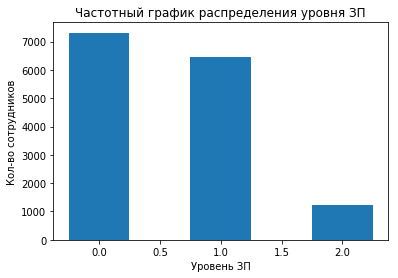

In [27]:
plt.hist(df['wage'], bins=[-0.25, 0.25, 0.75, 1.25, 1.75, 2.25])
plt.xlabel('Уровень ЗП')
plt.ylabel('Кол-во сотрудников')
plt.title('Частотный график распределения уровня ЗП')
plt.show()

Большинство сотрудников имеет низкий и средний уровень ЗП

### 8. Показать распределение сотрудников по зарплатам совместно с департаментами

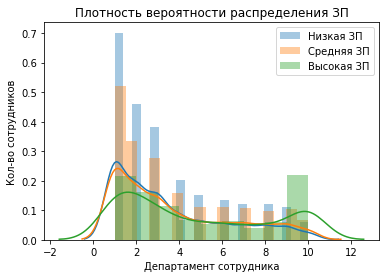

In [33]:
low_salary = df[df['wage'] == 0]['department']
medium_salary = df[df['wage'] == 1]['department']
high_salary = df[df['wage'] == 2]['department']
sns.distplot(low_salary)
sns.distplot(medium_salary)
sns.distplot(high_salary)
plt.title('Плотность вероятности распределения ЗП')
plt.legend(['Низкая ЗП', 'Средняя ЗП', 'Высокая ЗП'])
plt.xlabel('Департамент сотрудника')
plt.ylabel('Кол-во сотрудников')
plt.show()

Как видно из графика, большинство сотрудников трех первых отделов (продажи, тех. специалисты и поддержка) имеют низкую и среднюю ЗП, в то время как бОльшая часть высоких зарплат сконцентрировала в отделе менеджмента (№10).

### 9. Сколько сотрудников покинули компанию.

In [37]:
print(df[df['left'] == 1]['left'].count(), 'сотрудник покинул компанию')

3571 сотрудник покинул компанию


### 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

#### 10.1. Гипотеза: у уволившихся и оставшихся сотрудников одинаковый уровень удовлетворенности.

In [102]:
non_left_sat = df[df['left']==0]['satisfaction_level']
left_sat = df[df['left']==1]['satisfaction_level']

In [103]:
len(non_left_sat), len(left_sat)

(11428, 3571)

In [104]:
non_left_sat = non_left_sat.sample(3500)
left_sat = left_sat.sample(3500)

In [105]:
statistics.variance(non_left_sat), statistics.variance(left_sat)

(0.04697015698362798, 0.06949575980075941)

In [106]:
stats.ttest_ind(non_left_sat, left_sat, equal_var=False)

Ttest_indResult(statistic=39.355881849377866, pvalue=3.791559560290306e-305)

p-value гораздо меньше стандартной альфа ошибки 0.05, поэтому мы не принимаем нулевую гипотезу и можем сказать, что имеется статистическое различие между удовлетворенностью работой у ушедших сотрудников и у оставшихся.

#### 10.2. Гипотеза: у уволившихся и оставшихся сотрудников одинаково высокие оценки аттестации

In [77]:
non_left_ev = df[df['left']==0]['last_evaluation']
left_ev = df[df['left']==1]['last_evaluation']

In [78]:
len(non_left_ev), len(left_ev)

(11428, 3571)

In [79]:
non_left_ev = non_left_sat.sample(3500)
left_ev = left_sat.sample(3500)

In [80]:
statistics.variance(non_left_ev), statistics.variance(left_ev)

(0.04644190888008819, 0.06936186701506554)

In [82]:
stats.ttest_ind(non_left_ev, left_ev, equal_var=False)

Ttest_indResult(statistic=39.990776657985215, pvalue=0.0)

Аналогично, p-value имеет малое значение и отвергает гипотезу о сходстве оценки аттестации для уволившихся сотрудников и оставшихся.

#### 10.3. Проверим, влияет ли уровень ЗП на уход сотрудников.

In [95]:
non_left_wage = df[df['left']==0]['wage'].sample(n=3500)
left_wage = df[df['left']==1]['wage'].sample(n=3500)

In [96]:
statistics.variance(non_left_wage), statistics.variance(left_wage)

(0.4313545911076634, 0.28973919078920507)

In [97]:
stats.ttest_ind(non_left_wage, left_wage, equal_var=False)

Ttest_indResult(statistic=16.939463937084966, pvalue=4.585664887747396e-63)

Малое значение p-value позволяет отвергнуть и гипотезу о сходстве уровня ЗП для уволившихся сотрудников и оставшихся.

#### 10.4. Проверим, влияет ли повышения последние 5 лет на уход сотрудников.

In [98]:
non_left_promotion = df[df['left']==0]['promotion_last_5years'].sample(n=3500)
left_promotion = df[df['left']==1]['promotion_last_5years'].sample(n=3500)

In [ ]:
statistics.variance(non_left_promotion), statistics.variance(left_promotion)

In [99]:
stats.ttest_ind(non_left_promotion, left_promotion, equal_var=False)

Ttest_indResult(statistic=7.764554717838161, pvalue=9.96074204214707e-15)

Малое значение p-value позволяет отвергнуть очередную гипотезу - о наличии/отсутствии повышений для уволившихся сотрудников и оставшихся.

Вывод: все опровергнутые гипотезы позволяют резюмировать, что на уход сотрудников из компании влияет множество факторов: разный уровень ЗП, отсутствие повышений за последние 5 лет, уровень удовлетворенности и оценка последней аттестации.  